# Bank Customer Churn Prediction

Untuk bisnis di bidang apa pun, penting untuk mempertahankan pelanggan konsisten tetap menggunakan jasa kita agar perusahaan tetap bertahan. Churn adalah jumlah orang yang meninggalkan bisnis pada jangka waktu tertentu. Angka ini menjadi penting ketika melewati ambang batas tertentu.


## Business Understanding

Customer churn merupakan salah satu masalah besar yang dihadapi oleh industri perbankan. Menarik pelanggan baru memerlukan biaya yang jauh lebih tinggi dibandingkan mempertahankan pelanggan yang sudah ada. Oleh karena itu, bank sangat tertarik untuk mengetahui faktor-faktor apa yang menyebabkan pelanggan memutuskan untuk meninggalkan layanan mereka. Dengan memahami alasan di balik churn, bank dapat mengembangkan program loyalitas dan kampanye retensi untuk mempertahankan pelanggan mereka.

Menurut riset oleh Harvard Business Review, perusahaan dengan tingkat retensi pelanggan yang tinggi cenderung lebih sukses dan menguntungkan. Sehingga, prediksi churn dengan akurasi tinggi bisa sangat membantu dalam menyusun strategi retensi yang efektif.

### Problem Statements:
*   Bagaimana cara memprediksi apakah seorang pelanggan akan meninggalkan bank atau tidak berdasarkan data historis pelanggan?
*   Dari beberapa faktor yang ada, faktor apa saja yang paling berpengaruh terhadap keputusan pelanggan untuk pergi dari Bank?


### Goals:

*   Membangun model machine learning yang dapat memprediksi churn pelanggan secara akurat.
*   Mengidentifikasi faktor-faktor utama yang menyebabkan pelanggan pergi dari Bank.



### Solution Statement :

Untuk mencapai tujuan di atas, maka perlu pendekatan solusi yang akan diterapkan sebagai berikut:

* Menggunakan beberapa algoritma untuk memprediksi customer churn secara akurat
* Melakukan improvement pada baseline model dengan hyperparameter tuning.
* Menganalisis data lebih dalam untuk mengetahui faktor apa saja yang mempengaruhi terjadinya customer churn

Solusi akan dievaluasi menggunakan metrik seperti Accuracy, Precision, Recall, dan F1-Score untuk memastikan performa yang optimal.

## Data Understanding

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv("customer_churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### Deskripsi Variabel

Dataset terdiri dari 14 kolom atau fitur yang memberikan informasi mengenai pelanggan dan perilaku mereka:

* RowNumber — Urutan baris, tidak berpengaruh pada model.
* CustomerId — ID pelanggan (acak, tidak relevan untuk model).
* Surname — Nama belakang pelanggan (tidak berpengaruh pada model).
* CreditScore — Skor kredit pelanggan dalam melunasi kredit, semakin tinggi semakin baik.
* Geography — Lokasi geografis pelanggan, yang mungkin mempengaruhi churn.
* Gender — Jenis kelamin pelanggan, berpotensi memengaruhi perilaku churn.
* Age — Usia pelanggan, di mana pelanggan yang lebih tua cenderung lebih loyal.
* Tenure — Lama pelanggan menjadi nasabah bank.
* Balance — Saldo rekening pelanggan.
* NumOfProducts — Jumlah produk yang dibeli dengan bank tersebut oleh pelanggan.
* HasCrCard — Apakah pelanggan memiliki kartu kredit.
* IsActiveMember — Apakah pelanggan aktif menggunakan layanan bank.
* EstimatedSalary — Gaji yang diperkirakan dari pelanggan.
* Exited — Apakah pelanggan meninggalkan bank (label target).
* Complain — pelanggan mempunyai keluhan atau tidak.
* Satisfaction Score — Skor yang diberikan oleh pelanggan untuk penyelesaian keluhan mereka.
* Card Type — jenis kartu yang dipegang oleh pelanggan.
* Point Earned — poin yang diperoleh pelanggan karena menggunakan kartu kredit.

### Exploratory Data Analysis

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Info Dataset

* Terdapat 4 kolom dengan tipe object, yaitu: Surname, Geography, Gender, dan Card Type. Kolom ini merupakan categorical features (fitur non-numerik).
* Terdapat 14 kolom numerik dengan tipe data int64 dan float64 yaitu: RowNumber, CustomerID, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Complain, Satisfaction Score, Point Earned.
* Kolom "Exited" adalah target dari prediksi ini.

In [7]:
# Deskripsi Statistik
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#### Data Cleaning

In [8]:
# Hapus kolom yang tidak diperlukan
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [9]:
# Cek apakah ada nilai kosong
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Tidak ada nilai kosong disetiap kolomnya

In [10]:
# Cek apakah ada data terduplikat
df.duplicated().sum()

0

Tidak ada data yang terduplikat

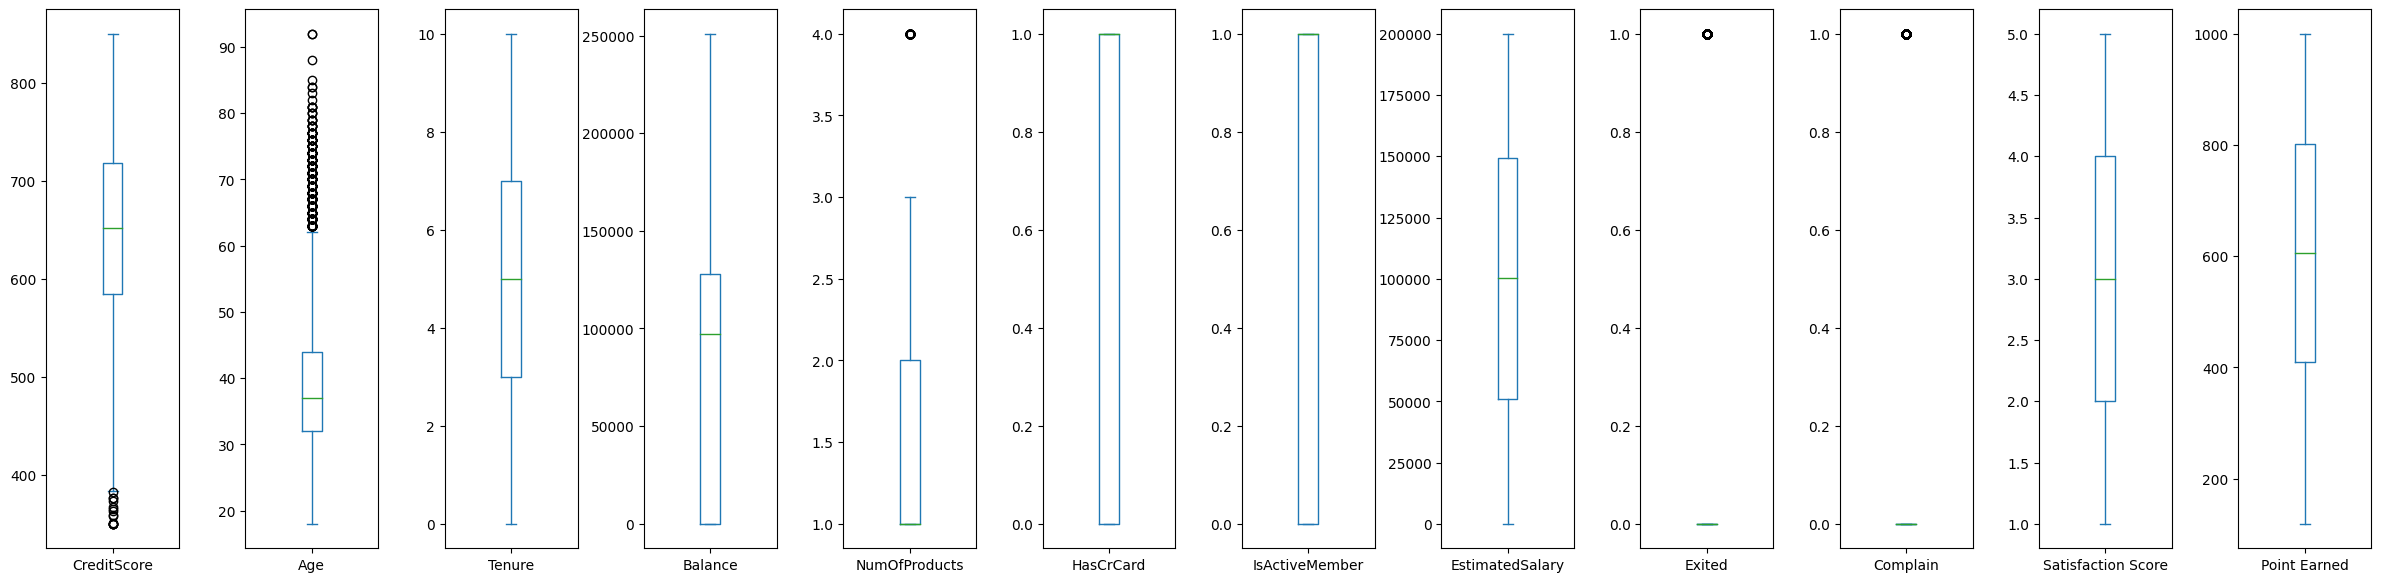

In [11]:
# Cek apakah ada outliers

# Visualisasi Boxplot
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(30, 7)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

Pada grafik boxplot di atas, dapat dilihat bahwa terdapat outliers pada kolom age dan creditscore. Akan tetapi, kali ini outliers tidak akan di hapus karena data tersebut masih direntang yang masuk akal dan masih mengandung informasi penting untuk prediksi Customer Churn

#### Univariate Analysis

In [12]:
# Mengklasifikasi kategori fitur
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']
categorical_features = ['Geography', 'Gender', 'Card Type']

##### Fitur Kategorikal

        jumlah_data  persentase
Gender                         
Male           5457        54.6
Female         4543        45.4


<Axes: title={'center': 'Gender'}, xlabel='Gender'>

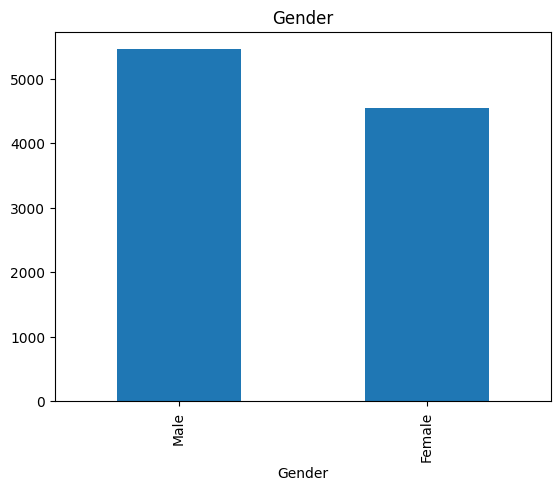

In [13]:
# Fitur Gender
gender = categorical_features[1]
jumlah = df[gender].value_counts()

persentase = 100 * df[gender].value_counts(normalize=True)

data = pd.DataFrame({'jumlah_data':jumlah, 'persentase':persentase.round(1)})
print(data)

jumlah.plot(kind='bar', title=gender)

Berdasarkan grafik di atas, customer laki - laki lebih banyak, sekitar 54,6% dari seluruh data, daripada perempuan sebesar 45,4%.

           jumlah_data  persentase
Card Type                         
DIAMOND           2507        25.1
GOLD              2502        25.0
SILVER            2496        25.0
PLATINUM          2495        25.0


<Axes: title={'center': 'Card Type'}, xlabel='Card Type'>

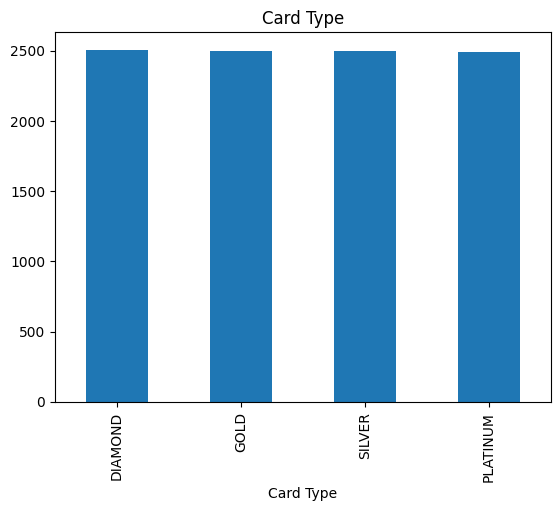

In [14]:
# Fitur Card Type
card_type = categorical_features[2]
jumlah = df[card_type].value_counts()

persentase = 100 * df[card_type].value_counts(normalize=True)

data = pd.DataFrame({'jumlah_data':jumlah, 'persentase':persentase.round(1)})
print(data)

jumlah.plot(kind='bar', title=card_type)

Terdapat 4 kategori tipe kartu yang dimiliki oleh customer, yaitu Diamond, Gold, Silver, Platinum. Masing - masing kategori tersebut memiliki jumlah yang sama yaitu 25% dari jumlah dataset, sekitar 2500 customer untuk masing - masing kategori

           jumlah_data  persentase
Geography                         
France            5014        50.1
Germany           2509        25.1
Spain             2477        24.8


<Axes: title={'center': 'Geography'}, xlabel='Geography'>

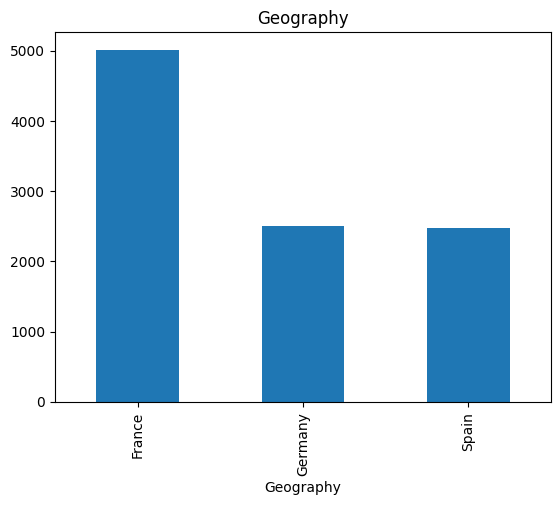

In [15]:
# Fitur Geography
geography = categorical_features[0]
jumlah = df[geography].value_counts()

persentase = 100 * df[geography].value_counts(normalize=True)

data = pd.DataFrame({'jumlah_data':jumlah, 'persentase':persentase.round(1)})
print(data)

jumlah.plot(kind='bar', title=geography)

Dari grafik di atas, dapat dilihat bahwa Bank tersebut banyak yang berasal dari negara France, sekitar 50% dari sampel. Sedangkan sisanya, yaitu berasal dari Germany dan Spain sebanyak 25% dari data untuk masing - masing negara

##### Fitur Numerik

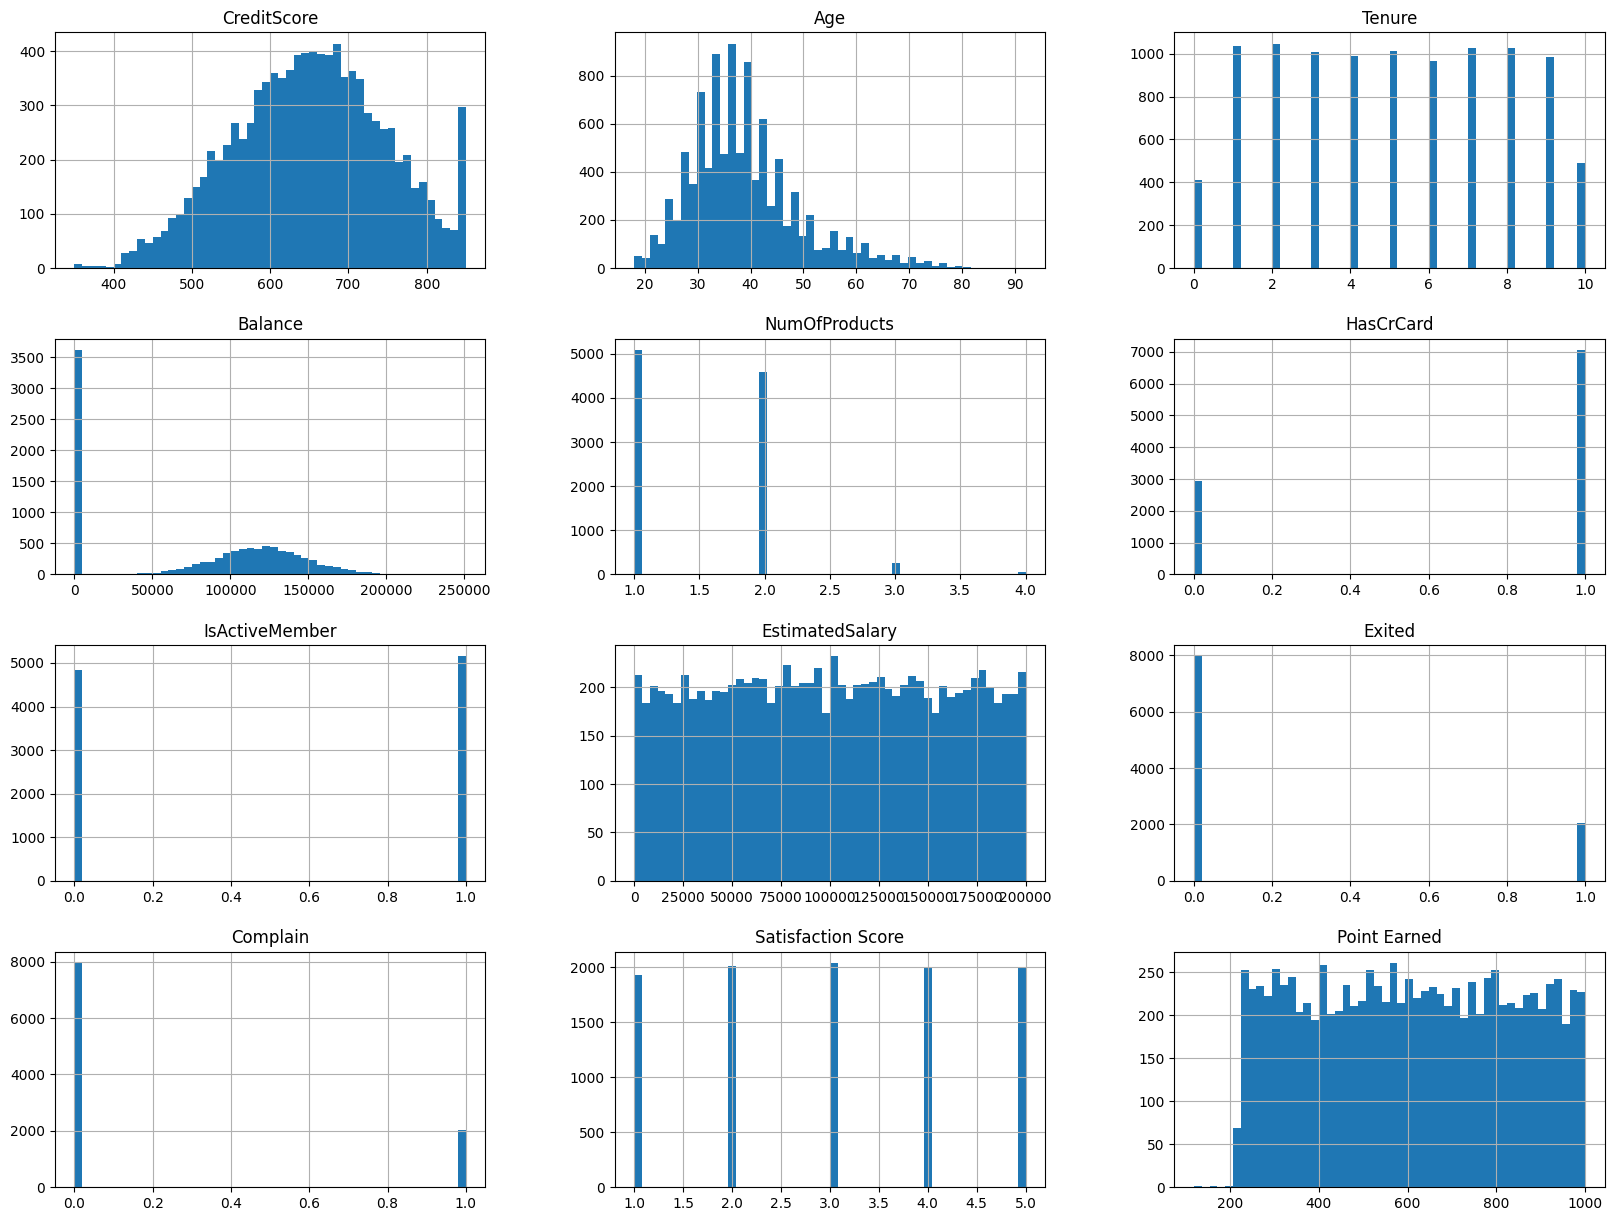

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari grafik di atas, maka dapat disimpulkan sebagai berikut :

* Skor pelanggan dalam melunasi kredit berkisar di antara 600 - 700, yang berarti rata - rata nasabah cukup cepat melunasi kredit
* Customer bank tersebut kebanyakan berumur 35 - 40 tahun
* Cukup banyak pelanggan yang tidak memiliki saldo di rekening bank tersebut
* Hampir 50% pelanggan pada sampel sudah tidak aktif menggunakan layanan bank tersebut
* Gaji pelanggan pada bank tersebut cukup variatif dari 0 - 200.000
* 20% pelanggan dari sampel mengeluh dengan bank tersebut.


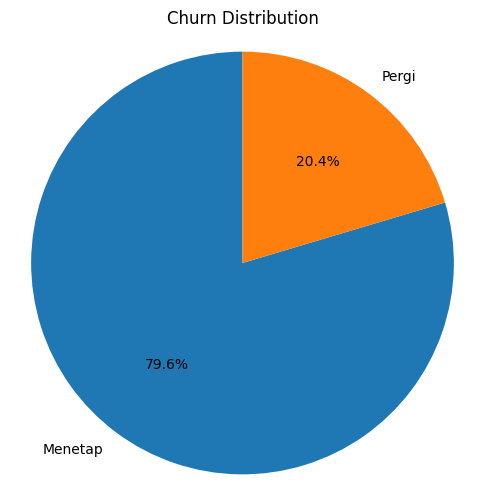

In [17]:
labels = ['Menetap', 'Pergi']
plt.figure(figsize = (6,6))
plt.pie(x = df['Exited'].value_counts(), labels= labels,
        autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

20% pelanggan dari sampel meninggalkan bank tersebut. Hal ini terhitung cukup besar dan merugikan

#### Multivariate Analysis

##### Fitur Kategorikal

In [18]:
categorical_features = df.select_dtypes(include='object').columns.to_list()
categorical_features = categorical_features[0:3]

In [19]:
categorical_features

['Geography', 'Gender', 'Card Type']

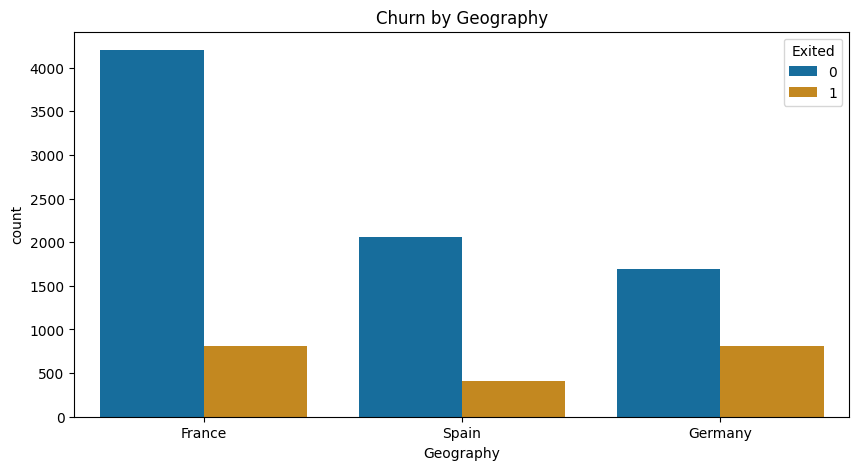

In [20]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x= categorical_features[0], hue = 'Exited', palette = 'colorblind')
plt.title('Churn by {}'.format(categorical_features[0]))
plt.show()

Dari grafik, dapat dilihat bahwa banyak pelanggan yang keluar berasal dari negara German dan France.

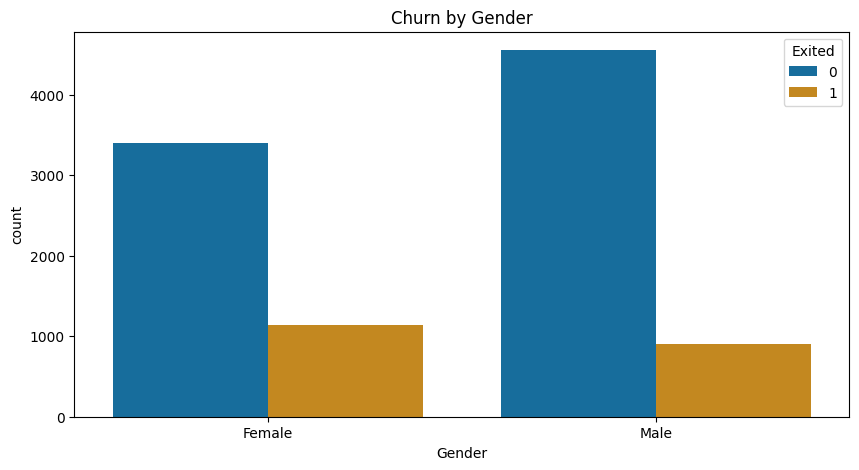

In [21]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x= categorical_features[1], hue = 'Exited', palette = 'colorblind')
plt.title('Churn by {}'.format(categorical_features[1]))
plt.show()

In [22]:
# churn rate berdasarkan gender

churn_rate_gender = df.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


Dari semua pelanggan perempuan, 25% perempuan memutuskan untuk meninggalkan bank.Dari semua pelanggan laki - laki, 16% meninggalkan bank

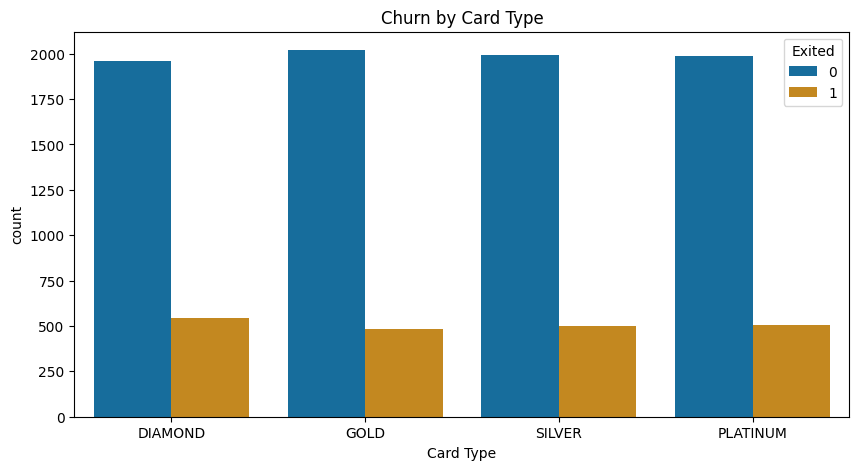

In [23]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x= categorical_features[2], hue = 'Exited', palette = 'colorblind')
plt.title('Churn by {}'.format(categorical_features[2]))
plt.show()

In [24]:
# churn rate berdasarkan Card Type

churn_rate_card_type = df.groupby('Card Type')['Exited'].mean()*100
print(churn_rate_card_type)

Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: Exited, dtype: float64


Sekitar 20% pelanggan dari tiap kategori kartu memutuskan untuk pergi meninggalkan bank




##### Fitur Numerik

In [25]:
# Memilih kolom yang diperlukan
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']
len(numerical_features)

12

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

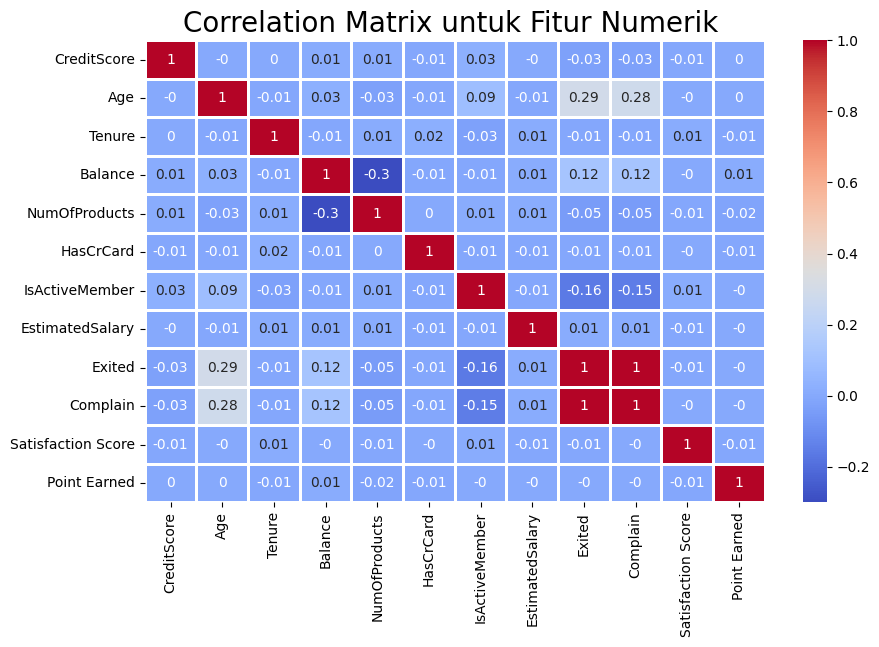

In [26]:
# Heatmap
plt.figure(figsize=(10, 6))

correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Jika diperhatikan dengan baik, fitur 'Complain' memiliki skor korelasi dengan target 'Exited' sebesar 1. Artinya, hampir setiap pelanggan yang meninggalkan bank tersebut pasti memiliki keluhan dengan bank tersebut.

Selain itu, adapun fitur 'Age' dan 'Balance' yang memiliki korelasi dengan fitur 'Exited' meskipun korelasi nya rendah. Dapat dikatakan bahwa umur pelanggan dan jumlah saldo rekening pelanggan dapat sedikit mempengaruhi apakah pelanggan meninggalkan bank atau tidak.

Tetapi terdapat fitur 'IsActiveMember' yang berkorelasi negatif dengan fitur 'Exited'. Berarti kedua fitur tersebut berbanding terbalik nilainya meskipun korelasi nya lemah.

Selain fitur tersebut, semua fitur lainnya memiliki korelasi yang kecil. Sehingga tidak diperlukan untuk melakukan prediksi dan dapat dihapus

In [27]:
df.drop(columns=['CreditScore','Tenure','NumOfProducts','HasCrCard','EstimatedSalary','Satisfaction Score','Point Earned'], inplace=True, axis=1)
df.head()

,Geography,Gender,Age,Balance,IsActiveMember,Exited,Complain,Card Type
0,France,Female,42,0.00,1,1,1,DIAMOND
1,Spain,Female,41,83807.86,1,0,1,DIAMOND
2,France,Female,42,159660.80,0,1,1,DIAMOND
3,France,Female,39,0.00,0,0,0,GOLD
4,Spain,Female,43,125510.82,1,0,0,GOLD


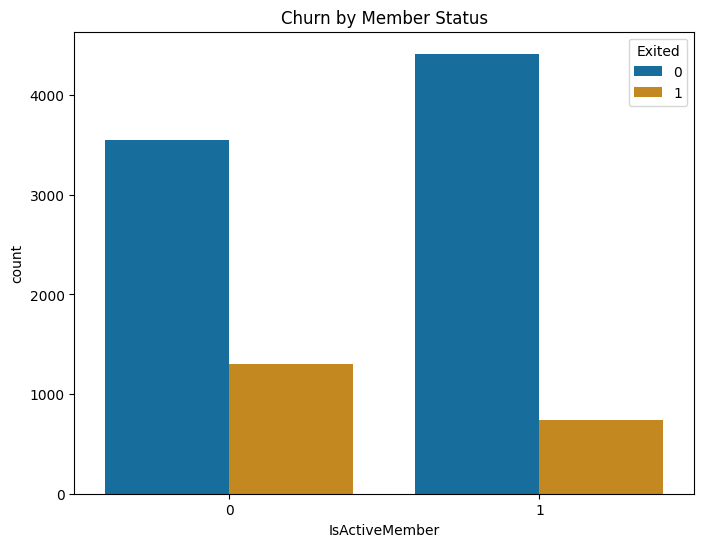

In [28]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Status')
plt.show()

In [29]:
# Churn rate berdasarkan member aktif
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


Member yang tidak aktif lebih banyak meninggalkan bank daripada yang masih aktif

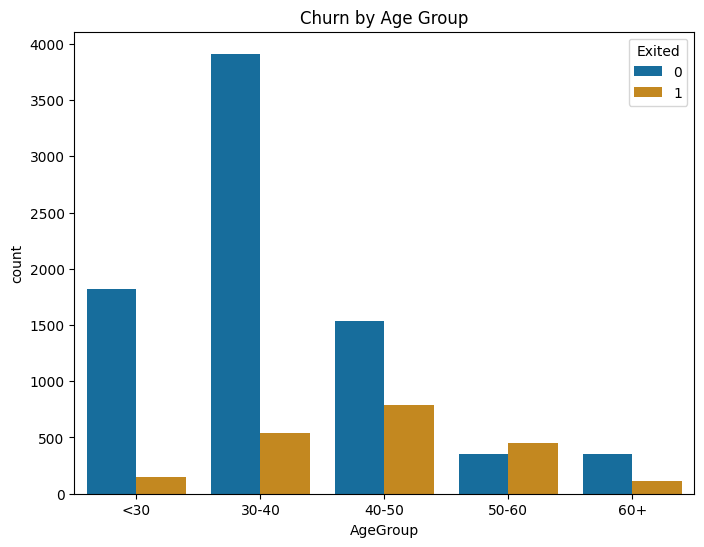

In [30]:
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf],
                        labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
plt.title('Churn by Age Group')
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette= 'colorblind')
plt.show()

In [31]:
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-40    12.109638
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


Pelanggan dalam kelompok usia 50-60 tahun memiliki tingkat churn tertinggi, yaitu 56.21%. Ini berarti lebih dari separuh pelanggan dalam kelompok usia ini memutuskan untuk meninggalkan bank.

In [32]:
# Hapus fitur 'AgeGroup' karena tidak terpakai
df.drop(columns='AgeGroup', inplace=True)

## Data Preparation

### Encoding Fitur Kategori

In [33]:
from sklearn.preprocessing import OneHotEncoder

for i in categorical_features:
  df = pd.concat([df, pd.get_dummies(df[i], prefix=i, dtype=int)], axis=1)

df.drop(categorical_features, axis=1, inplace=True)
df.head()

,Age,Balance,IsActiveMember,Exited,Complain,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,42,0.00,1,1,1,1,0,0,1,0,1,0,0,0
1,41,83807.86,1,0,1,0,0,1,1,0,1,0,0,0
2,42,159660.80,0,1,1,1,0,0,1,0,1,0,0,0
3,39,0.00,0,0,0,1,0,0,1,0,0,1,0,0
4,43,125510.82,1,0,0,0,0,1,1,0,0,1,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Balance             10000 non-null  float64
 2   IsActiveMember      10000 non-null  int64  
 3   Exited              10000 non-null  int64  
 4   Complain            10000 non-null  int64  
 5   Geography_France    10000 non-null  int64  
 6   Geography_Germany   10000 non-null  int64  
 7   Geography_Spain     10000 non-null  int64  
 8   Gender_Female       10000 non-null  int64  
 9   Gender_Male         10000 non-null  int64  
 10  Card Type_DIAMOND   10000 non-null  int64  
 11  Card Type_GOLD      10000 non-null  int64  
 12  Card Type_PLATINUM  10000 non-null  int64  
 13  Card Type_SILVER    10000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.1 MB


### Splitting Data

In [35]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Exited', axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [36]:
print(f'Total data of sample in whole dataset: {len(x)}')
print(f'Total data of sample in train dataset: {len(x_train)}')
print(f'Total data of sample in test dataset: {len(x_test)}')

Total data of sample in whole dataset: 10000
Total data of sample in train dataset: 8000
Total data of sample in test dataset: 2000


### Handling Imbalance Data

Karena jumlah target ['Exited'] tidak seimbang, maka dilakukan teknik oversampling SMOTE agar target data seimbang

<Axes: >

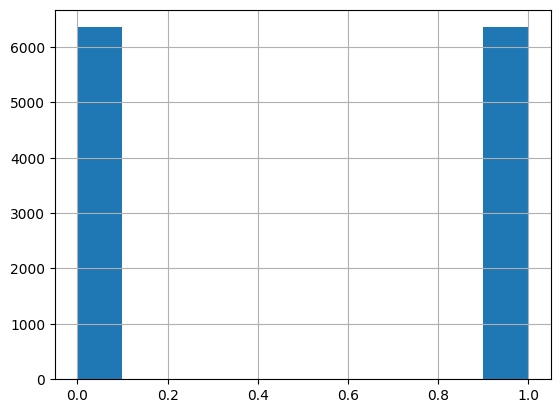

In [56]:
# Oversampling menggunakan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train, y_train = smote.fit_resample(x_train,y_train)

y_train.hist()

### Standarisasi

Proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Hal ini membuat nilai tiap fitur memiliki skala yang sama

Dalam kasus ini:
* Kolom yang memerlukan standarisasi: Age, dan Balance
* Kolom yang tidak memerlukan standarisasi: IsActiveMember, Complain (karena hanya menunjukkan kategori biner).

In [38]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Balance']
scaler = StandardScaler()
scaler.fit_transform(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,Age,Balance
0,-0.870813,-1.318933
1,0.109171,0.621155
2,-1.654799,0.541935
3,-1.360804,0.880846
4,1.481147,0.986431


## Modeling

In [39]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['RandomForest', 'Decision Tree', 'XGBoost', 'CatBoost'])

In [40]:
# Buat fungsi untuk membuat model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def train_model(model, x_train=x_train,y_train = y_train, x_test = x_test, y_test = y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)


    return (accuracy_score(y_test, y_pred))

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
print('Akurasi Prediksi Churn : ', train_model(rf))

Akurasi Prediksi Churn :  0.9885


### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
print('Akurasi Prediksi Churn : ', train_model(dt))

Akurasi Prediksi Churn :  0.9085


### XGBoost

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
print('Akurasi Prediksi Churn : ', train_model(xgb))

Akurasi Prediksi Churn :  0.8145


### Catboost

In [ ]:
# !pip install catboost

In [47]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose=1000)
print('Akurasi Prediksi Churn : ', train_model(cb))

Learning rate set to 0.030507
0:	learn: 0.6000070	total: 62.9ms	remaining: 1m 2s
999:	learn: 0.0017533	total: 11s	remaining: 0us
Akurasi Prediksi Churn :  0.859


## Evaluasi Model

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Buat variabel accuracy yang isinya adalah dataframe nilai accuracy, precision, recall, dan F1 score pada data train dan test
accuracy = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'],
                        index=['RandomForest', 'Decision Tree', 'XGBoost', 'CatBoost'])

# Dictionary untuk model yang digunakan
model_dict = {'RandomForest': rf, 'Decision Tree': dt, 'XGBoost': xgb, 'CatBoost': cb}

# Loop melalui setiap model dan hitung metrik evaluasi
for name, model in model_dict.items():
    # Prediksi untuk data test
    y_test_pred = model.predict(x_test)

    # Hitung metrik evaluasi untuk data train dan test
    accuracy.loc[name, 'accuracy'] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
    accuracy.loc[name, 'precision'] = precision_score(y_true=y_test, y_pred=y_test_pred, average='binary').round(3)
    accuracy.loc[name, 'recall'] = recall_score(y_true=y_test, y_pred=y_test_pred, average='binary').round(3)
    accuracy.loc[name, 'f1'] = f1_score(y_true=y_test, y_pred=y_test_pred, average='binary').round(3)

# Tampilkan dataframe accuracy dengan metrik tambahan
accuracy


,accuracy,precision,recall,f1
RandomForest,0.9885,0.947,0.997,0.971
Decision Tree,0.9085,0.682,1.0,0.811
XGBoost,0.8145,0.514,1.0,0.679
CatBoost,0.859,0.582,1.0,0.736


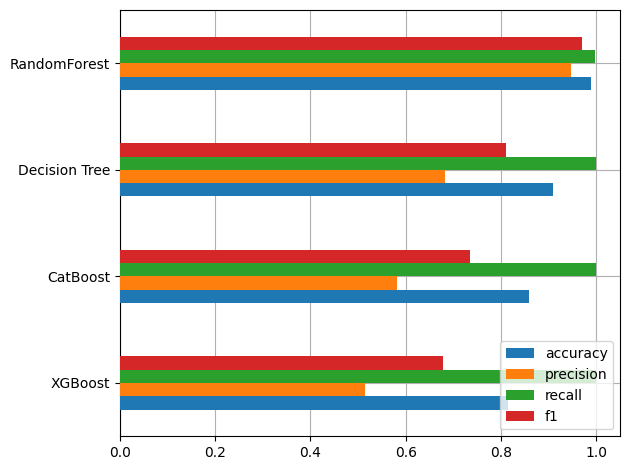

In [49]:
# Visualisasi Skor Akurasi

fig, ax = plt.subplots()
accuracy.sort_values(by='accuracy', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Dari grafik akurasi di atas, dapat dilihat bahwa algoritma Random Forest mempunyai skor tertinggi

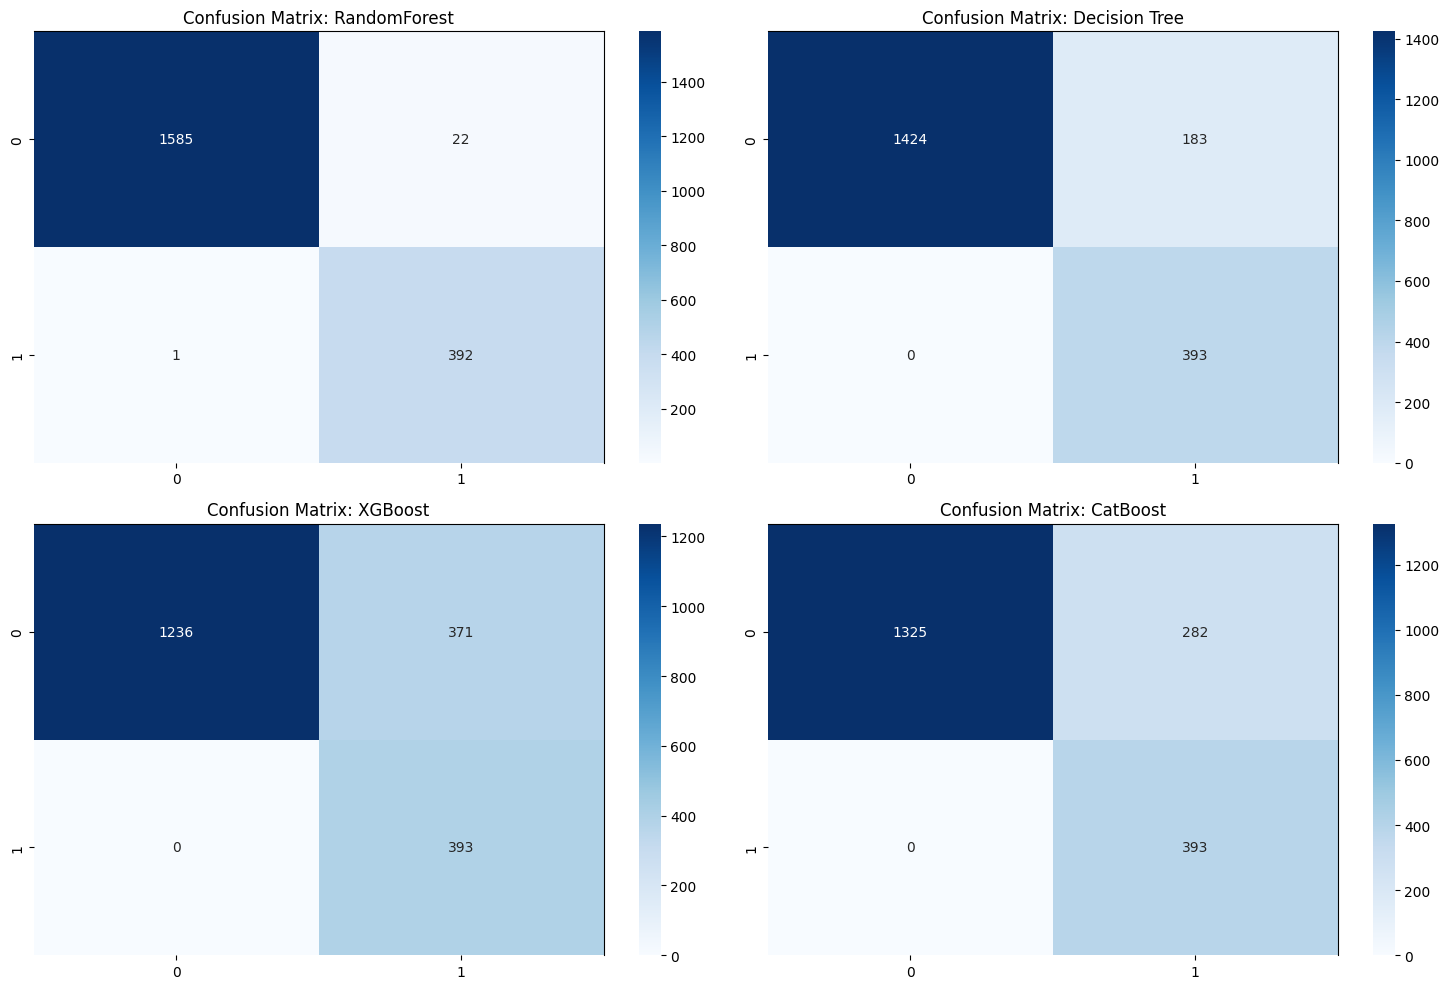

In [50]:
# Buat subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid
axes = axes.ravel()  # Flatten the axes array

# Dictionary untuk menampung model dan namanya
model_dict = {'RandomForest': rf, 'Decision Tree': dt, 'XGBoost': xgb, 'CatBoost': cb}

# Loop untuk setiap model dan plot confusion matrix-nya
for idx, (name, model) in enumerate(model_dict.items()):
    # Prediksi menggunakan model
    y_pred = model.predict(x_test)

    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=axes[idx], cmap="Blues")

    # Beri judul pada setiap subplot
    axes[idx].set_title(f'Confusion Matrix: {name}')
    axes[idx].set_adjustable('box')  # Allow subplot adjustments
    axes[idx].spines['top'].set_visible(True)  # Show top border
    axes[idx].spines['right'].set_visible(True)  # Show right border

# Menambahkan spacing antara subplots
plt.tight_layout()
plt.show()

Dari gambar di atas, dapat disimpulkan bahwa model dengan Algoritma Random Forest memiliki hasil skor metrik yang tinggi, dengan penjelasan sebagai berikut :
* Jumlah prediksi benar (True Positive dan True Negative) jauh lebih banyak dibandingkan prediksi salah (False Positive dan False Negative). Ini menunjukkan bahwa model secara keseluruhan mampu mengklasifikasikan data dengan baik.

* Jumlah True Negative sangat tinggi, yang berarti model sangat akurat dalam mengidentifikasi kasus di mana kelas sebenarnya adalah negatif.

* Jumlah True Positive juga cukup tinggi, menunjukkan bahwa model mampu mengidentifikasi sebagian besar kasus di mana kelas sebenarnya adalah positif.

* Jumlah False Positive dan False Negative sangat kecil, mengindikasikan bahwa model jarang melakukan kesalahan dalam mengklasifikasikan data.

## Prediksi

In [54]:
prediksi = x_test.iloc[66:67].copy()
prediksi

,Age,Balance,IsActiveMember,Complain,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
2753,28,0.0,0,0,1,0,0,1,0,0,0,0,1


### Hasil Prediksi

In [55]:
prediksi = x_test.iloc[66:67].copy()
pred_dict = {'Label':y_test[66:67]}
pred_dict['Prediksi Model RandomForest'] = model.predict(prediksi)

pd.DataFrame(pred_dict)

,Label,Prediksi Model RandomForest
2753,0,0


## Kesimpulan

Dengan demikian, model dengan algoritma Random Forest menjadi solusi model yang dipilih untuk membuat prediksi apakah pelanggan akan meninggalkan bank atau tidak, dengan tingkat akurasi yang sangat baik, dapat dipercaya dan akurat daripada model lainnya.

Faktor - faktor yang mempengaruhi pergi atau tidaknya seorang pelanggan adalah umur, saldo, status member (aktif/tidak aktif), dan yang paling mempengaruhi sekali adalah keluhan pelanggan. Jika pelanggan memiliki keluhan, maka hampir dipastikan pelanggan tersebut akan meninggalkan bank